In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 16:19:29.066957: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:19:29.167173: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:19:29.168686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 16:19:30.467709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 2)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 2)         38        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 2)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         76        
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 4)         0

In [6]:
trainer.training_loop()

2023/08/13 16:19:34 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 16:19:34 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/80
56/56 - 7s - loss: 0.6654 - recall: 0.9104 - binary_accuracy: 0.6043 - precision: 0.6154 - false_negatives: 48.0000 - false_positives: 305.0000 - val_loss: 0.6102 - val_recall: 0.8881 - val_binary_accuracy: 0.6712 - val_precision: 0.6723 - val_false_negatives: 15.0000 - val_false_positives: 58.0000 - 7s/epoch - 132ms/step


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/80
56/56 - 4s - loss: 0.6020 - recall: 0.8022 - binary_accuracy: 0.6749 - precision: 0.7003 - false_negatives: 106.0000 - false_positives: 184.0000 - val_loss: 0.5715 - val_recall: 0.8209 - val_binary_accuracy: 0.6532 - val_precision: 0.6748 - val_false_negatives: 24.0000 - val_false_positives: 53.0000 - 4s/epoch - 68ms/step
Epoch 3/80
56/56 - 5s - loss: 0.5504 - recall: 0.8246 - binary_accuracy: 0.7242 - precision: 0.7441 - false_negatives: 94.0000 - false_positives: 152.0000 - val_loss: 0.5269 - val_recall: 0.7985 - val_binary_accuracy: 0.7162 - val_precision: 0.7483 - val_false_negatives: 27.0000 - val_false_positives: 36.0000 - 5s/epoch - 85ms/step
Epoch 4/80
56/56 - 4s - loss: 0.5188 - recall: 0.7985 - binary_accuracy: 0.7399 - precision: 0.7754 - false_negatives: 108.0000 - false_positives: 124.0000 - val_loss: 0.5680 - val_recall: 0.6194 - val_binary_accuracy: 0.7162 - val_precision: 0.8737 - val_false_negatives: 51.0000 - val_false_positives: 12.0000 - 4s/epoch - 71ms/s

2023/08/13 16:23:59 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 16:23:59 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpum6lxr72/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpum6lxr72/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 1s 23ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9757462686567164, 'fp_Train_acc': 0.9798206278026906, 'fp_Train_precision': 0.990530303030303}
Confusion matrix Train 
 [[351   5]
 [ 13 523]]
56/56 [==============================] - 1s 23ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (233).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (282).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (334).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (37).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (235).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (396).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (4).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (425).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (429).jpeg'

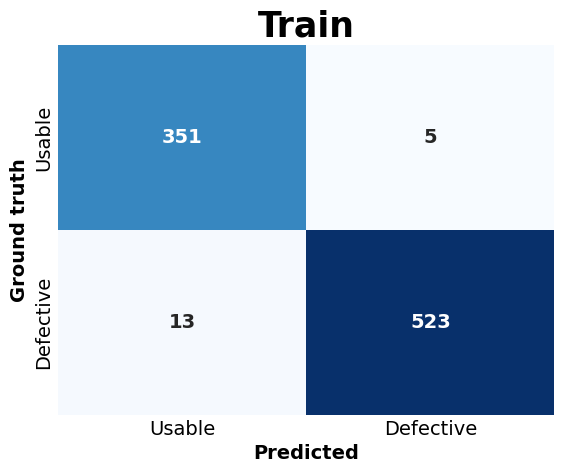

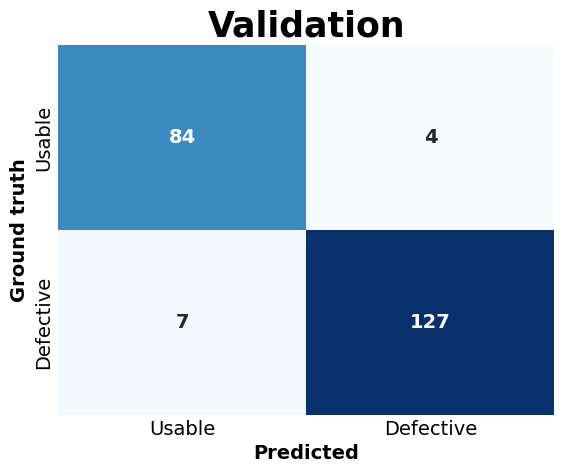

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmphckmns1a/assets


INFO:tensorflow:Assets written to: /tmp/tmphckmns1a/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 16:24:13.148546: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 16:24:13.148574: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 16:24:13.148905: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmphckmns1a
2023-08-13 16:24:13.151914: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 16:24:13.151948: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmphckmns1a
2023-08-13 16:24:13.157707: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\\\r\x00\x00l\r\x00\x00\xc0"\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xe2\xf1\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00*\xf3\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00x\x0c\x00\x00p\x0c\x00\x00X\x0c\x00\x00<\x0c\x00\x00,\x08\x00\x00\xdc\x07\x00\x00L\x03\x00\x00\x1c\x03\x00\x00\xec\x01\x00\x00\xcc\x01\x00\x00t\x01\x00\x00\\\x01\x00\x00(\x

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 1s 23ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.00084513397, 'qt_std': 0.014947089, 'qt_abs_mean': 0.007707686, 'qt_abs_std': 0.012834379}


{'diff': array([-2.06999108e-03, -2.10905075e-03, -2.05585454e-03,  4.02149744e-03,
         1.69183239e-02,  1.71188149e-03, -2.23222392e-04, -5.12725115e-03,
         2.82481313e-03,  1.35947764e-02,  8.75208713e-03,  8.62824963e-04,
        -2.28112862e-02,  3.77732366e-02, -3.88573110e-03,  8.80479813e-04,
         7.85993412e-04,  1.68650318e-03,  2.63361726e-04,  8.18908215e-03,
         4.25666384e-03,  7.62604177e-04,  1.68727315e-03, -4.16126102e-04,
         4.51887399e-03, -5.24487346e-04, -2.03285664e-02, -5.97811490e-03,
        -2.65016854e-02, -4.00395319e-03, -5.07505611e-04, -1.66340545e-03,
        -3.88033688e-04,  2.53419280e-02, -1.42324716e-03, -4.78901714e-03,
        -7.00015575e-03, -1.41455419e-02, -2.34207883e-03, -1.43724191e-03,
        -8.26961987e-05,  4.14449815e-03, -1.90828443e-02,  9.28534195e-03,
        -2.01926078e-03, -2.72288173e-03, -3.24499269e-04, -2.24209577e-03,
         2.59155408e-03,  4.79358248e-03, -4.18742595e-04,  1.56294405e-02,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9757462686567164, 'qt_Train_acc': 0.9798206278026906, 'qt_Train_precision': 0.990530303030303}
Confusion matrix Train 
 [[351   5]
 [ 13 523]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (233).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (282).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (334).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (37).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (235).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (396).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (4).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (425).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (429).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (434).jpeg', '../dataset/resize_128/train/1_defeituoso/d

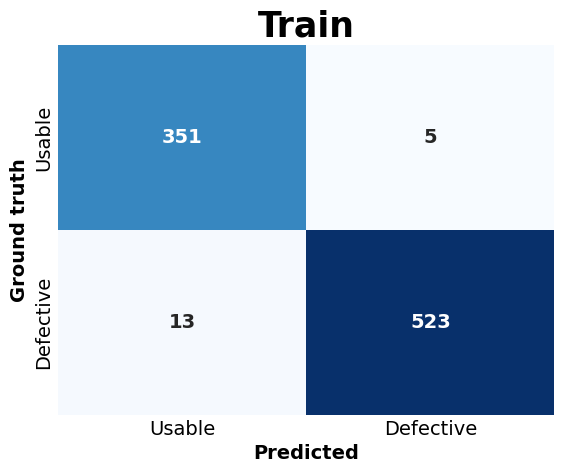

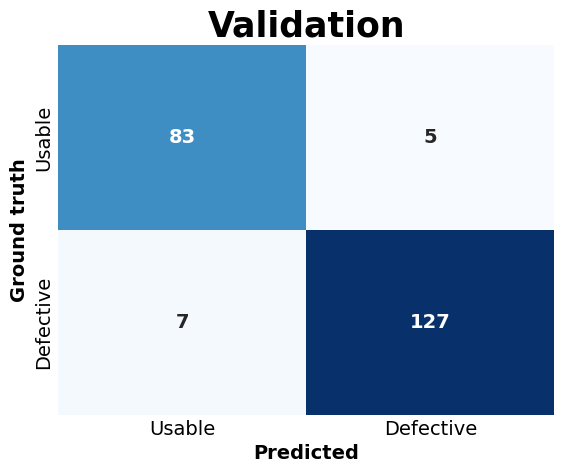

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 22ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9454545454545454, 'fp_Test_acc': 0.9617486338797814, 'fp_Test_precision': 0.9904761904761905}
Confusion matrix Test 
 [[ 72   1]
 [  6 104]]
12/12 [==============================] - 0s 22ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (704).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (743).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (774).jpeg']


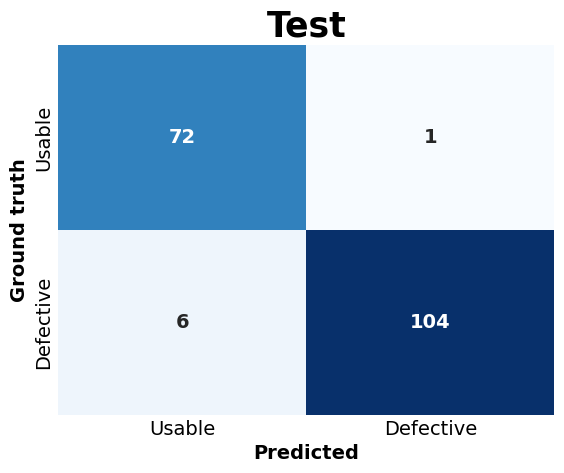

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9454545454545454, 'qt_Test_acc': 0.9562841530054644, 'qt_Test_precision': 0.9811320754716981}
Confusion matrix Test 
 [[ 71   2]
 [  6 104]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (704).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (743).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (774).jpeg']


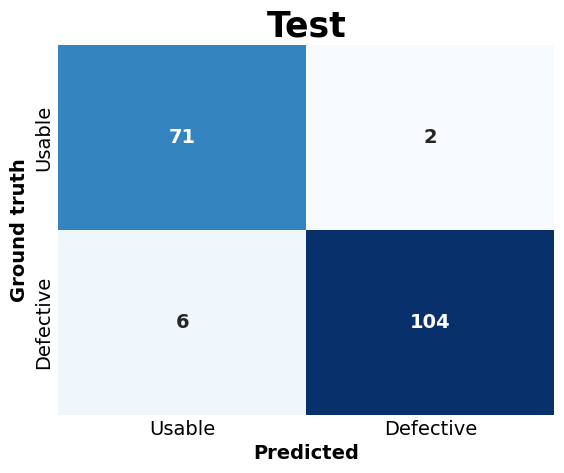

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()